# Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D,MaxPool2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

C:\Users\siddhant\.conda\envs\linkedln\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\siddhant\.conda\envs\linkedln\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\siddhant\.conda\envs\linkedln\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train_df=pd.read_csv('mnist_train.csv') # load training dataset

In [3]:
train_df.shape # 60k labeled data we have

(60000, 785)

In [4]:
train_df.values[0].max() 

255

In [5]:
train_df.values[0].min()

0

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
# Splitting the data into dependent and independent variables
X_train = train_df.drop(columns=['label'])
y_train=train_df['label']

In [8]:
# normalize the X data between 0-1
X_train = X_train/255

In [9]:
# data is normalized 
X_train.values.max(),X_train.values.min()

(1.0, 0.0)

In [10]:
y_train.values

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

<Axes: xlabel='label', ylabel='Count'>

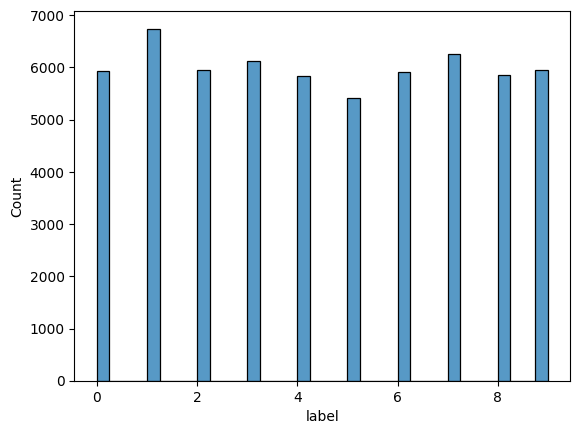

In [11]:
sns.histplot(y_train)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
# Apply one-hot-encoding on Y data, convert to categorical problem
y_train=to_categorical(y_train,10)

In [14]:
y_train[0] # for number 5 binary data 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
# Reshape the input data to 4-D (sampleSize,height,width,colurChannel)
X_train = X_train.values.reshape(60000, 28, 28, 1)

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
# Let's check the first image of number 5
first_image=X_train[0]

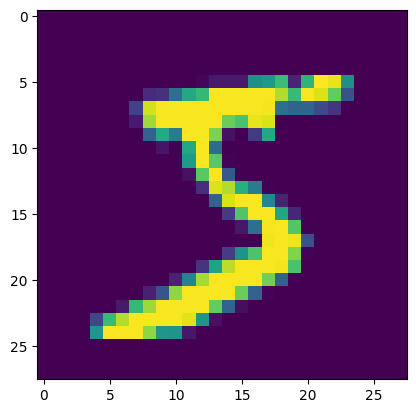

In [18]:
plt.imshow(first_image)

In [19]:
# Retrieve the number from binary Y data
np.argmax(y_train[0])

5

In [20]:
X_train.shape

(60000, 28, 28, 1)

# Create a model

In [21]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D())

model.add(Flatten())  # Flatten the output for fully connected layers

model.add(Dense(128, activation='relu')) 

# Output layer
model.add(Dense(10, activation='softmax'))  


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop=EarlyStopping(patience=1)

In [26]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=early_stop)

Epoch 1/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1583 - accuracy: 0.9516 - val_loss: 0.0817 - val_accuracy: 0.9751
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0532 - val_accuracy: 0.9834
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0472 - val_accuracy: 0.9867


In [28]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

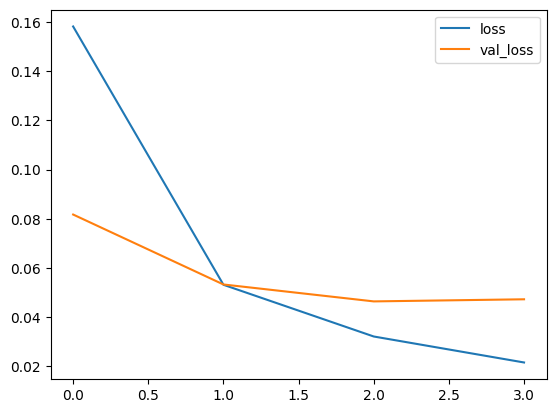

In [29]:
metrics[['loss','val_loss']].plot()

<Axes: >

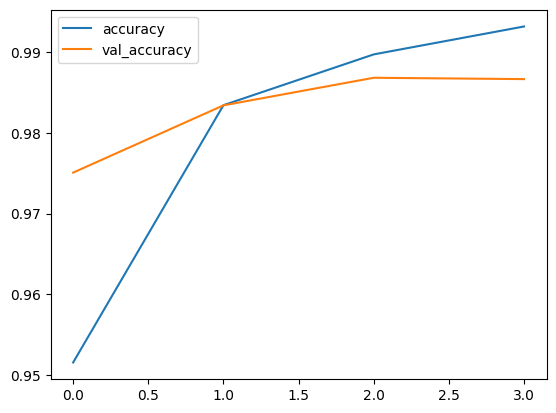

In [30]:
metrics[['accuracy','val_accuracy']].plot()

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
model.evaluate(X_test,y_test)

375/375 [==============================] - 1s 2ms/step - loss: 0.0472 - accuracy: 0.9867


[0.0471869595348835, 0.9866666793823242]

In [33]:
# Getting Good Score from Above model

In [34]:
testing_data = pd.read_csv('mnist_test.csv')
testing_data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_test=testing_data.drop(columns='label')
y_test=testing_data['label']

In [36]:
X_test = X_test/255.0

In [37]:
X_test = X_test.values.reshape(10000, 28, 28, 1)

# Predict on the test data
y_pred = model.predict(X_test)

In [38]:
y_pred

array([[1.2271335e-12, 1.5841091e-11, 4.6263313e-09, ..., 1.0000000e+00,
        1.1466841e-09, 4.3643048e-08],
       [1.1173366e-11, 8.3337380e-07, 9.9999917e-01, ..., 7.3887511e-12,
        2.1282302e-10, 3.9354276e-14],
       [2.0434085e-07, 9.9998701e-01, 3.6850750e-08, ..., 4.7108247e-06,
        2.9066341e-06, 3.0961857e-08],
       ...,
       [2.0790097e-14, 4.0522012e-09, 9.4104290e-12, ..., 8.1631732e-09,
        3.9231819e-07, 7.1966170e-08],
       [1.7995296e-10, 2.4262286e-14, 1.6411339e-13, ..., 4.5728046e-11,
        1.6931470e-05, 2.4804690e-11],
       [1.7730474e-10, 7.4674399e-11, 3.4272410e-10, ..., 1.2612359e-12,
        4.0046347e-10, 5.6424605e-12]], dtype=float32)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert predictions to labels
y_pred_labels = [np.argmax(pred) for pred in y_pred]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
class_report = classification_report(y_test, y_pred_labels)
print("Classification Report:\n", class_report)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", confusion_mat)

Test Accuracy: 98.77%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
 [[ 971    1    1    0    0    1    4    1    1    0]
 [   0 1133    0    0    0    0    1    0    1    0]
 [   3    4 1013    0    0    0    2    6    4    0]
 [   0    0    1 

In [41]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

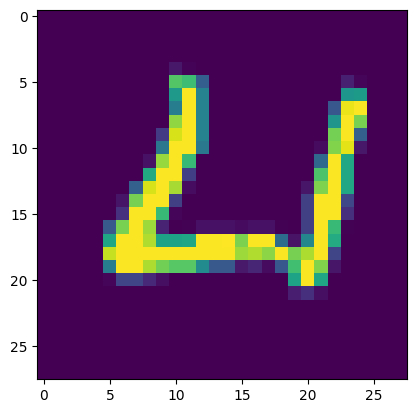

In [42]:
test_number=X_test[33]
plt.imshow(test_number.reshape(28,28))

In [43]:
# Predict the number
np.argmax(model.predict(test_number.reshape(1,28,28,1)), axis=-1)

array([4], dtype=int64)

# Saving Model

In [44]:
model.save('mnist_model.h5')

In [45]:
from tensorflow.keras.models import load_model

model=load_model('mnist_model.h5')


In [46]:
# Predict the number
np.argmax(model.predict(test_number.reshape(1,28,28,1)), axis=-1)

array([4], dtype=int64)